# 刘东阳 3220200915

# 数据集：Wines Review

### Github地址：https://github.com/lucien1998/DataMingLDY

In [13]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from fancyimpute import KNN
WineReviews_data = pd.read_csv('winemag-data-130k-v2.csv')

# 3.1 数据可视化和摘要

## 3.1.1 数据摘要

### 3.1.1（1）标称属性：

In [14]:
# country(每个可能取值的频数)
print(WineReviews_data['country'].value_counts())

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

In [15]:
# province(每个可能取值的频数)
print(WineReviews_data['province'].value_counts())

California          36247
Washington           8639
Bordeaux             5941
Tuscany              5897
Oregon               5373
                    ...  
Krania Olympus          1
Alenteo                 1
Lutzville Valley        1
Dalmatian Coast         1
Muscat of Patras        1
Name: province, Length: 425, dtype: int64


In [16]:
# region1(每个可能取值的频数)
print(WineReviews_data['region_1'].value_counts())

Napa Valley                           4480
Columbia Valley (WA)                  4124
Russian River Valley                  3091
California                            2629
Paso Robles                           2350
                                      ... 
Est! Est!! Est!!! di Montefiascone       1
Landes                                   1
Valpolicella Valpantena                  1
Ohio                                     1
Sovana                                   1
Name: region_1, Length: 1229, dtype: int64


In [17]:
# region_2(每个可能取值的频数)
print(WineReviews_data['region_2'].value_counts())

Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Southern Oregon        917
Oregon Other           727
Long Island            680
North Coast            584
Washington Other       534
South Coast            272
New York Other         231
Name: region_2, dtype: int64


In [18]:
# taster_name(每个可能取值的频数)
print(WineReviews_data['taster_name'].value_counts())

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64


In [19]:
# taster_twitter_handle(每个可能取值的频数)
print(WineReviews_data['taster_twitter_handle'].value_counts())

@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1005
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64


In [20]:
# variety(每个可能取值的频数)
print(WineReviews_data['variety'].value_counts())

Pinot Noir                        13272
Chardonnay                        11753
Cabernet Sauvignon                 9472
Red Blend                          8946
Bordeaux-style Red Blend           6915
                                  ...  
Sauvignon Blanc-Sauvignon Gris        1
Dafni                                 1
Favorita                              1
Gros Plant                            1
Picapoll                              1
Name: variety, Length: 707, dtype: int64


In [21]:
# country(每个可能取值的频数)
print(WineReviews_data['winery'].value_counts())

Wines & Winemakers    222
Testarossa            218
DFJ Vinhos            215
Williams Selyem       211
Louis Latour          199
                     ... 
Damia                   1
Coquena                 1
Marquis de Chasse       1
Viña Paquita            1
Woodside                1
Name: winery, Length: 16757, dtype: int64


### 3.1.1（2）数值属性（五数概括、缺失值个数）：points，price

In [22]:
#五数概括
WineReviews_data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [23]:
#缺失值个数
WineReviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


由结果可知，总计129971条数据。<br>country缺失值的个数为63。<br>description缺失值的个数为0。<br>designation缺失值的个数为37465。<br>points缺失值的个数为0。<br>price缺失值的个数为8996。<br>province缺失值的个数为63。<br>region_1缺失值的个数为21247。<br>region_2缺失值的个数为79460。<br>taster_name缺失值的个数为26244。<br>taster_twitter_handle缺失值的个数为31213。<br>title缺失值的个数为0。<br>variety缺失值的个数为1。<br>winery缺失值的个数为0。

## 3.1.2 数据可视化

### 3.1.2（1）直方图（数据分布）

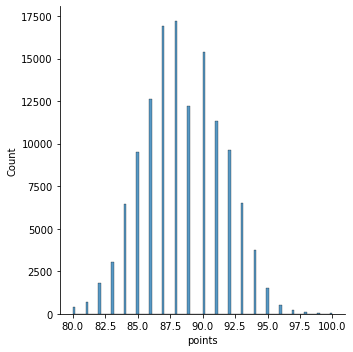

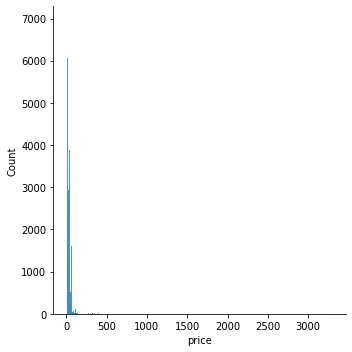

In [24]:
sns.displot(WineReviews_data['points'])
plt.show()
sns.displot(WineReviews_data['price'])
plt.show()

### 3.1.2（2）盒图（离群点）

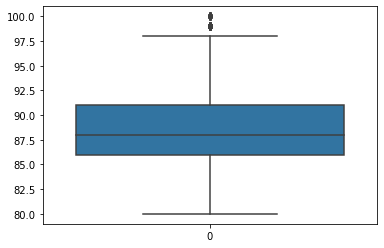

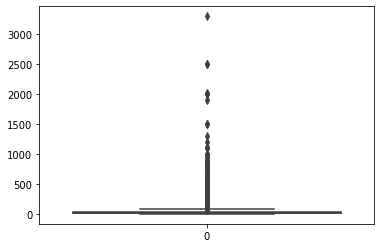

In [25]:
sns.boxplot(data=WineReviews_data['points'])
plt.show()
sns.boxplot(data=WineReviews_data['price'])
plt.show()

# 3.2 数据缺失的处理


分析数据缺失原因：数据库进行数据写入时数据丢失，或者数据本身就是缺失数据，没有被统计到。


## 3.2.1 将缺失部分剔除

（1）处理前



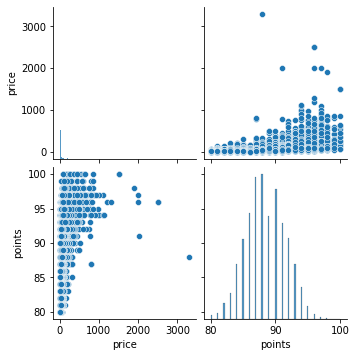

0          NaN
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64
-----------------------------------------------------------------------

（2）处理后



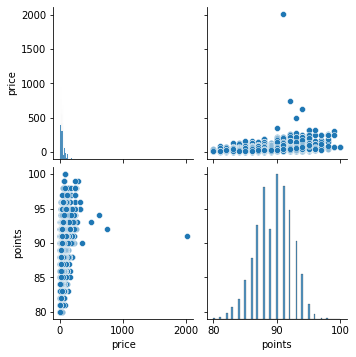

4          65.0
10         19.0
23         22.0
25         69.0
35         50.0
          ...  
129919    105.0
129926     41.0
129945     20.0
129949     35.0
129950     35.0
Name: price, Length: 22387, dtype: float64


In [26]:
print("（1）处理前\n")
sns.pairplot(WineReviews_data, vars=["price","points"])
plt.show()
print(WineReviews_data['price'])
print("-----------------------------------------------------------------------\n")
print("（2）处理后\n")
WineReviews_data_after = WineReviews_data.dropna()
sns.pairplot(WineReviews_data_after, vars=["price","points"])
plt.show()
print(WineReviews_data_after['price'])

##  3.2.2 用最高频率值来填补缺失值

（1）处理前



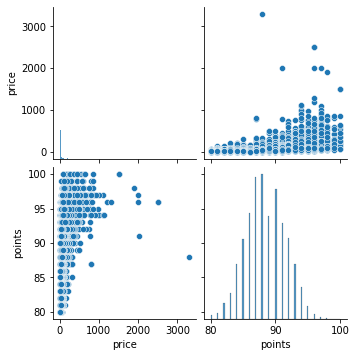

0          NaN
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null

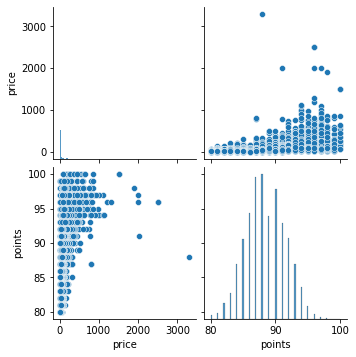

0         20.0
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               129971 non-null  object 
 9   taster_name            129971 non-null  object 
 10  taster_twitter_handle  129971 non-nul

In [27]:
print("（1）处理前\n")
WineReviews_data2 = WineReviews_data.copy(deep=True)
sns.pairplot(WineReviews_data2, vars=["price","points"])
plt.show()
print(WineReviews_data2['price'])
print("\n===================\n")
WineReviews_data2.info()
print("-----------------------------------------------------------------------\n")
print("（2）处理后\n")
WineReviews_data2['price'].fillna(WineReviews_data2['price'].mode().iloc[0],inplace=True)
WineReviews_data2['country'].fillna(WineReviews_data2['country'].mode().iloc[0],inplace=True)
WineReviews_data2['description'].fillna(WineReviews_data2['description'].mode().iloc[0],inplace=True)
WineReviews_data2['designation'].fillna(WineReviews_data2['designation'].mode().iloc[0],inplace=True)
WineReviews_data2['province'].fillna(WineReviews_data2['province'].mode().iloc[0],inplace=True)
WineReviews_data2['country'].fillna(WineReviews_data2['country'].mode().iloc[0],inplace=True)
WineReviews_data2['region_1'].fillna(WineReviews_data2['region_1'].mode().iloc[0],inplace=True)
WineReviews_data2['region_2'].fillna(WineReviews_data2['region_2'].mode().iloc[0],inplace=True)
WineReviews_data2['taster_name'].fillna(WineReviews_data2['taster_name'].mode().iloc[0],inplace=True)
WineReviews_data2['taster_twitter_handle'].fillna(WineReviews_data2['taster_twitter_handle'].mode().iloc[0],inplace=True)
WineReviews_data2['variety'].fillna(WineReviews_data2['variety'].mode().iloc[0],inplace=True)
sns.pairplot(WineReviews_data2, vars=["price","points"])
plt.show()
print(WineReviews_data2['price'])
print("\n===================\n")
WineReviews_data2.info()
print("\n由于缺失值占比较低，所以在price的直方图、price和points之间的分布图中变化并不明显。\n但统计信息表中清晰地反映了缺失值被补全。")


## 3.2.3 通过属性的相关关系来填补缺失值

（1）处理前



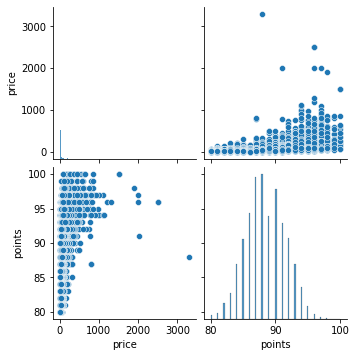

0          NaN
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64
-----------------------------------------------------------------------

（2）处理后



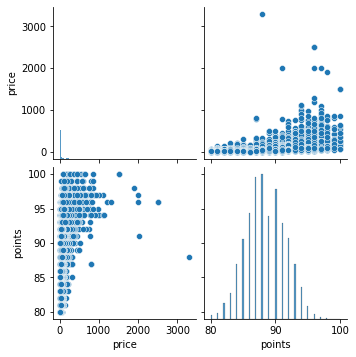

0         24.903054
1         15.000000
2         14.000000
3         13.000000
4         65.000000
            ...    
129966    28.000000
129967    75.000000
129968    30.000000
129969    32.000000
129970    21.000000
Name: price, Length: 129971, dtype: float64


In [28]:
print("（1）处理前\n")
WineReviews_data3 = WineReviews_data.copy(deep=True)
sns.pairplot(WineReviews_data3, vars=["price","points"])
plt.show()
print(WineReviews_data3['price'])
print("-----------------------------------------------------------------------\n")
print("（2）处理后\n")
def set_missing_prices(df):
    # 把数值型特征都放到随机森林里面去
    price_df = df[['price', 'points']]
    known_price = price_df[price_df.price.notnull()].iloc[:,:].values
    unknown_price = price_df[price_df.price.isnull()].iloc[:,:].values
    y = known_price[:, 0]  # y是price，第一列数据
    x = known_price[:, 1:]  # x是特征属性值，后面几列
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    # 根据已有数据去拟合随机森林模型
    rfr.fit(x, y)
    # 预测缺失值
    predictedprices = rfr.predict(unknown_price[:, 1:])
    # 填补缺失值
    df.loc[(df.price.isnull()), 'price'] = predictedprices
    return df
WineReviews_data3 = set_missing_prices(WineReviews_data3)
sns.pairplot(WineReviews_data3, vars=["price","points"])
plt.show()
print(WineReviews_data3['price'])

## 3.2.4 通过数据对象之间的相似性来填补缺失值

（1）处理前



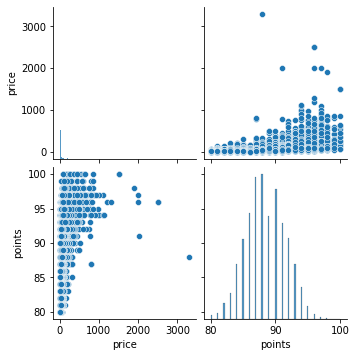

0          NaN
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64
-----------------------------------------------------------------------

（2）处理后

Imputing row 1/10000 with 1 missing, elapsed time: 14.362
Imputing row 101/10000 with 0 missing, elapsed time: 14.364
Imputing row 201/10000 with 1 missing, elapsed time: 14.365
Imputing row 301/10000 with 0 missing, elapsed time: 14.368
Imputing row 401/10000 with 0 missing, elapsed time: 14.370
Imputing row 501/10000 with 0 missing, elapsed time: 14.371
Imputing row 601/10000 with 0 missing, elapsed time: 14.371
Imputing row 701/10000 with 0 missing, elapsed time: 14.372
Imputing row 801/10000 with 0 missing, elapsed time: 14.373
Imputing row 901/10000 with 0 missing, elapsed time: 14.374
Imputing row 1001/10000 with 0 missing, elapsed time: 14.375
Imputing row 1101/10000 with 0 missing, elapsed tim

In [29]:
print("（1）处理前\n")
WineReviews_data4 = WineReviews_data.copy(deep=True)
sns.pairplot(WineReviews_data4, vars=["price","points"])
plt.show()
print(WineReviews_data4['price'])
print("-----------------------------------------------------------------------\n")
print("（2）处理后\n")
new_data = WineReviews_data4[['price', 'points']][:10000]
fill_knn = KNN(k=3).fit_transform(new_data)
print(fill_knn)